<a href="https://colab.research.google.com/github/luisdixz/ML-pypractices/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## Avance 1

###  Escribe las instrucciones de Python para acceder al conjunto de datos y asócialo con una variable de tipo DataFrame de Pandas

Después, crea los nombres de las
columnas en el DataFrame, según la descripción del conjunto de datos previo,

https://www.kaggle.com/datasets/fazilbtopal/auto85/code

In [ ]:
df = pd.read_csv('datos-autos-85.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
df.columns=[
    'simbolizacion',
    'perdidas_normalizadas',
    'marca',
    'tipo_de_combustible',
    'tipo_de_aspiracion',
    'tipo_de_auto',
    'tracción',
    'ubicación_del_motor',
    'ubicacion_motor',
    'distancia_entre_ejes',
    'longitud',
    'ancho',
    'altura',
    'peso',
    'tipo_motor',
    'cilindraje',
    'tamaño_motor',
    'sistema_combustion',
    'diametro_cilindro',
    'carrera_piston',
    'indice_compresion',
    'caballos_fuerza',
    'rpm_pico',
    'mpg_ciudad',
    'mpg_carretera',
    'precio'
]

### Escribe las instrucciones de Python para mostrar el DataFrame definido en el punto anterior.

In [ ]:
df.describe()

,simbolizacion,distancia_entre_ejes,longitud,ancho,altura,peso,tamaño_motor,indice_compresion,mpg_ciudad,mpg_carretera
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Escribe las instrucciones de Python para realizar un análisis exploratorio de los datos, el cual ayudará a contestar las siguientes preguntas:

* ¿Qué tipos de datos existen en el conjunto?
* ¿Cuántas instancias de datos componen el conjunto?
* ¿Cuáles son los valores únicos existentes en cada atributo?
* ¿Hay valores nulos? ¿En qué atributos y cuántos por cada atributo?
* ¿Qué atributos son categóricos? ¿Enteros o reales?

In [ ]:
df.dtypes

,0
simbolizacion,int64
perdidas_normalizadas,object
marca,object
tipo_de_combustible,object
tipo_de_aspiracion,object
tipo_de_auto,object
tracción,object
ubicación_del_motor,object
ubicacion_motor,object
distancia_entre_ejes,float64


In [ ]:
# Instancias de datos
df.shape

(204, 26)

In [ ]:
unicos = pd.Series({c: df[c].unique() for c in df})
unicos

,0
simbolizacion,"[3, 1, 2, 0, -1, -2]"
perdidas_normalizadas,"[?, 164, 158, 192, 188, 121, 98, 81, 118, 148,..."
marca,"[alfa-romero, audi, bmw, chevrolet, dodge, hon..."
tipo_de_combustible,"[gas, diesel]"
tipo_de_aspiracion,"[std, turbo]"
tipo_de_auto,"[two, four, ?]"
tracción,"[convertible, hatchback, sedan, wagon, hardtop]"
ubicación_del_motor,"[rwd, fwd, 4wd]"
ubicacion_motor,"[front, rear]"
distancia_entre_ejes,"[88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1..."


In [ ]:
df.nunique()

,0
simbolizacion,6
perdidas_normalizadas,52
marca,22
tipo_de_combustible,2
tipo_de_aspiracion,2
tipo_de_auto,3
tracción,5
ubicación_del_motor,3
ubicacion_motor,2
distancia_entre_ejes,53


In [ ]:
# null_count = df.isnull().sum()
# null_df = null_count.reset_index()
# null_df.columns = ['columna', 'valores_nulos']
# null_df
df.isnull().sum()

,0
simbolizacion,0
perdidas_normalizadas,0
marca,0
tipo_de_combustible,0
tipo_de_aspiracion,0
tipo_de_auto,0
tracción,0
ubicación_del_motor,0
ubicacion_motor,0
distancia_entre_ejes,0


In [ ]:
# Que atributos son categoricos, integer y reales
df_types = pd.DataFrame(columns=["integer", "real", "categorico"])
intlist = []
floatlist = []
stringlist = []
for i in df.columns:
  if df[i].dtype == "int64":
    intlist.append(i)
  elif df[i].dtype == "float64":
    floatlist.append(i)
  else:
    stringlist.append(i)
dftest = pd.DataFrame([intlist,floatlist,stringlist])
df_types = dftest.transpose()
df_types.columns = ["integer", "real", "categorico"]
df_types


,integer,real,categorico
0,simbolizacion,distancia_entre_ejes,perdidas_normalizadas
1,peso,longitud,marca
2,tamaño_motor,ancho,tipo_de_combustible
3,mpg_ciudad,altura,tipo_de_aspiracion
4,mpg_carretera,indice_compresion,tipo_de_auto
5,None,None,tracción
6,None,None,ubicación_del_motor
7,None,None,ubicacion_motor
8,None,None,tipo_motor
9,None,None,cilindraje


In [ ]:
df_types_count = df_types.notnull().sum()
df_types_count

,0
integer,5
real,5
categorico,16


## Avance 2

### Las columnas que se utilizaran para la predicción de los precios de los autos son las siguientes:

* pérdidas normalizadas
* distancia entre ejes
* longitud
* ancho
* altura
* peso
* tamaño del motor
* diámetro del cilindro
* carrera del pistón
* índice de compresión
* caballos de fuerza
* RPM pico
* MPG en ciudad
* MPG en carretera

Crea un nuevo DataFrame solo con estos atributos.

In [ ]:
seleccion_columnas = ["perdidas_normalizadas","distancia_entre_ejes","longitud","ancho","altura","peso","tamaño_motor",
                      "diametro_cilindro","carrera_piston","indice_compresion","caballos_fuerza","rpm_pico","mpg_ciudad","mpg_carretera","precio"]
df_sel = df[seleccion_columnas]
df_sel.head()

,perdidas_normalizadas,distancia_entre_ejes,longitud,ancho,altura,peso,tamaño_motor,diametro_cilindro,carrera_piston,indice_compresion,caballos_fuerza,rpm_pico,mpg_ciudad,mpg_carretera,precio
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
df_types = pd.DataFrame(columns=["integer", "real", "categorico"])
intlist = []
floatlist = []
stringlist = []
for i in df_sel.columns:
  if df_sel[i].dtype == "int64":
    intlist.append(i)
  elif df_sel[i].dtype == "float64":
    floatlist.append(i)
  else:
    stringlist.append(i)
dftest = pd.DataFrame([intlist,floatlist,stringlist])
df_types = dftest.transpose()
df_types.columns = ["integer", "real", "categorico"]
df_types

,integer,real,categorico
0,None,perdidas_normalizadas,None
1,None,distancia_entre_ejes,None
2,None,longitud,None
3,None,ancho,None
4,None,altura,None
5,None,peso,None
6,None,tamaño_motor,None
7,None,diametro_cilindro,None
8,None,carrera_piston,None
9,None,indice_compresion,None


### Reemplazar valores faltantes en columnas por NaN

In [ ]:
df_sel.replace('?', np.nan, inplace=True)
df_sel

,perdidas_normalizadas,distancia_entre_ejes,longitud,ancho,altura,peso,tamaño_motor,diametro_cilindro,carrera_piston,indice_compresion,caballos_fuerza,rpm_pico,mpg_ciudad,mpg_carretera,precio
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
200,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
201,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
202,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


### 4. Conversión de columnas a tipo flotante

* pérdidas normalizadas
* diámetro de cilindro
* carrera del pistón
* caballos de fuerza
* RPM pico

In [ ]:
df_sel[['perdidas_normalizadas','diametro_cilindro','carrera_piston','caballos_fuerza','rpm_pico','precio']] = df_sel[['perdidas_normalizadas','diametro_cilindro','carrera_piston','caballos_fuerza','rpm_pico','precio']].astype(float)
df_sel.dtypes

,0
perdidas_normalizadas,float64
distancia_entre_ejes,float64
longitud,float64
ancho,float64
altura,float64
peso,int64
tamaño_motor,int64
diametro_cilindro,float64
carrera_piston,float64
indice_compresion,float64


### 5. Identificar valores nulos en el nuevo DataFrame

In [ ]:
df_sel.isnull().sum()

,0
perdidas_normalizadas,40
distancia_entre_ejes,0
longitud,0
ancho,0
altura,0
peso,0
tamaño_motor,0
diametro_cilindro,4
carrera_piston,4
indice_compresion,0


### 6. Identificar y eliminar registros con precios faltantes

In [ ]:
df_sel_na = df_sel[df_sel.precio.isnull()]
df_sel_na


,perdidas_normalizadas,distancia_entre_ejes,longitud,ancho,altura,peso,tamaño_motor,diametro_cilindro,carrera_piston,indice_compresion,caballos_fuerza,rpm_pico,mpg_ciudad,mpg_carretera,precio
8,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
43,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
44,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
128,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [ ]:
df_sel.drop(df_sel_na.index, inplace=True)
df_sel.isnull().sum()

,0
perdidas_normalizadas,36
distancia_entre_ejes,0
longitud,0
ancho,0
altura,0
peso,0
tamaño_motor,0
diametro_cilindro,4
carrera_piston,4
indice_compresion,0


### 7. Reemplazar datos faltantes por el valor medio del conjunto de datos

In [ ]:
# Faltantes en perdidas_normalizadas, diametro_cilindro, carrera_piston, caballos_fuerza, rpm_pico
df_sel = df_sel.fillna(df_sel.mean(numeric_only=True))
df_sel.isnull().sum()

,0
perdidas_normalizadas,0
distancia_entre_ejes,0
longitud,0
ancho,0
altura,0
peso,0
tamaño_motor,0
diametro_cilindro,0
carrera_piston,0
indice_compresion,0


### 8. Normalizar los atributos de los datos con valores entre 0 y 1

Excepto en la columna *precio*

In [ ]:
columnas_a_normalizar = df_sel.drop('precio', axis=1).columns
columnas_a_normalizar

Index(['perdidas_normalizadas', 'distancia_entre_ejes', 'longitud', 'ancho',
       'altura', 'peso', 'tamaño_motor', 'diametro_cilindro', 'carrera_piston',
       'indice_compresion', 'caballos_fuerza', 'rpm_pico', 'mpg_ciudad',
       'mpg_carretera'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
df_sel[columnas_a_normalizar] = scaler.fit_transform(df_sel[columnas_a_normalizar])
df_sel.head()

,perdidas_normalizadas,distancia_entre_ejes,longitud,ancho,altura,peso,tamaño_motor,diametro_cilindro,carrera_piston,indice_compresion,caballos_fuerza,rpm_pico,mpg_ciudad,mpg_carretera,precio
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


In [ ]:
df_sel.describe()

,perdidas_normalizadas,distancia_entre_ejes,longitud,ancho,altura,peso,tamaño_motor,diametro_cilindro,carrera_piston,indice_compresion,caballos_fuerza,rpm_pico,mpg_ciudad,mpg_carretera,precio
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.298429,0.357085,0.494448,0.478462,0.499292,0.414160,0.248528,0.564286,0.566594,0.198131,0.258685,0.395176,0.338889,0.386974,13205.690000
std,0.167940,0.176043,0.184286,0.179735,0.202371,0.201162,0.157172,0.191830,0.149608,0.250885,0.175026,0.195608,0.178680,0.179664,7966.982558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.184555,0.230321,0.381716,0.331197,0.350000,0.261831,0.138679,0.435714,0.498810,0.098437,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.220755,0.550000,0.580952,0.125000,0.219626,0.411874,0.305556,0.368421,10270.000000
75%,0.383508,0.460641,0.632836,0.544872,0.643750,0.558670,0.305660,0.744643,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [ ]:
df_sel.shape

(200, 15)

### 9. Función para separación de conjunto de datos en entrenamiento y pruebas

In [ ]:
def separacion_datos(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
# df_sel.describe()
X = df_sel.drop('precio', axis=1)
y = df_sel['precio']
X_train, X_test, y_train, y_test = separacion_datos(X, y)

## Avance 3

###  Crea una función que encapsule el proceso de entrenamiento de un algoritmo de regresión

Utiliza k vecinos cercanos (KNeighborsRegressor) y una validación simple con los datos de prueba. Esta función recibe cinco parámetros:
* El rango de valores de k vecinos.
* El conjunto de datos de entrenamiento.
* Los precios del conjunto de datos de entrenamiento.
* El conjunto de datos de prueba.
* Los precios del conjunto de datos de prueba.

La salida de la función será el MSE (error cuadrado medio, por  sus siglas en inglés) para cada valor de k vecinos. Utiliza los siguientes valores para los k vecinos: 1, 3, 5, 7 y 9


In [ ]:
def entrenamiento_knn_nvecinos(k_vecinos, X_train, y_train, X_test, y_test):
  knn = KNeighborsRegressor(n_neighbors=k_vecinos)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return mean_squared_error(y_test, y_pred)

In [ ]:
for i in [1, 3, 5, 7, 9]:
  print(f'MSE para {i} vecinos: {entrenamiento_knn_nvecinos(i, X_train, y_train, X_test, y_test):.2f}')

MSE para 1 vecinos: 10156130.55
MSE para 3 vecinos: 8622517.56
MSE para 5 vecinos: 17508710.09
MSE para 7 vecinos: 23513327.08
MSE para 9 vecinos: 30460192.87


In [ ]:
def r2_knn_nvecinos(k_vecinos, X_train, y_train, X_test, y_test):
  knn = KNeighborsRegressor(n_neighbors=k_vecinos)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return r2_score(y_test, y_pred)

In [ ]:
for i in [1, 3, 5, 7, 9]:
  print(f'R2 para {i} vecinos: {r2_knn_nvecinos(i, X_train, y_train, X_test, y_test):.2f}')

R2 para 1 vecinos: 0.91
R2 para 3 vecinos: 0.92
R2 para 5 vecinos: 0.84
R2 para 7 vecinos: 0.79
R2 para 9 vecinos: 0.73


###  Crea una función que encapsule el proceso de entrenamiento de un algoritmo KNeighborsRegressor con combinaciones diferentes de atributos.

* Peso y MPG en carretera.
* Peso, MPG en carretera y MPG en ciudad.
* Peso, MPG en carretera, MPG en ciudad y ancho.
* Peso, MPG en carretera, MPG en ciudad, ancho y caballos de fuerza.

La salida de la función será el MSE para cada entrenamiento y para la validación del modelo con los atributos anteriores

In [ ]:
def entrenamiento_knn_atributos(atributos, X_train, y_train, X_test, y_test):
  knn = KNeighborsRegressor(n_neighbors=5)
  knn.fit(X_train[atributos], y_train)
  y_pred_knn = knn.predict(X_test[atributos])
  return mean_squared_error(y_test, y_pred_knn), root_mean_squared_error(y_test, y_pred_knn), r2_score(y_test, y_pred_knn)

In [ ]:
knn_a, knn_rmse_a, knn_r2_a = entrenamiento_knn_atributos(['peso', 'mpg_carretera'], X_train, y_train, X_test, y_test)
knn_b, knn_rmse_b, knn_r2_b = entrenamiento_knn_atributos(['peso', 'mpg_carretera', 'mpg_ciudad'], X_train, y_train, X_test, y_test)
knn_c, knn_rmse_c, knn_r2_c = entrenamiento_knn_atributos(['peso', 'mpg_carretera', 'mpg_ciudad', 'ancho'], X_train, y_train, X_test, y_test)
knn_d, knn_rmse_d, knn_r2_d = entrenamiento_knn_atributos(['peso', 'mpg_carretera', 'mpg_ciudad', 'ancho', 'caballos_fuerza'], X_train, y_train, X_test, y_test)

print(f'MSE para peso y mpg en carretera: {knn_a:.2f}')
print(f'MSE para peso, mpg en carretera y mpg en ciudad: {knn_b:.2f}')
print(f'MSE para peso, mpg en carretera, mpg en ciudad y ancho: {knn_c:.2f}')
print(f'MSE para peso, mpg en carretera, mpg en ciudad, ancho y caballos de fuerza: {knn_d:.2f}')

MSE para peso y mpg en carretera: 15933988.08
MSE para peso, mpg en carretera y mpg en ciudad: 19085854.26
MSE para peso, mpg en carretera, mpg en ciudad y ancho: 13525397.34
MSE para peso, mpg en carretera, mpg en ciudad, ancho y caballos de fuerza: 9729549.98


In [ ]:
print(f'R2 para peso y mpg en carretera: {knn_r2_a:.2f}')
print(f'R2 para peso, mpg en carretera y mpg en ciudad: {knn_r2_b:.2f}')
print(f'R2 para peso, mpg en carretera, mpg en ciudad y ancho: {knn_r2_c:.2f}')
print(f'R2 para peso, mpg en carretera, mpg en ciudad, ancho y caballos de fuerza: {knn_r2_d:.2f}')

R2 para peso y mpg en carretera: 0.86
R2 para peso, mpg en carretera y mpg en ciudad: 0.83
R2 para peso, mpg en carretera, mpg en ciudad y ancho: 0.88
R2 para peso, mpg en carretera, mpg en ciudad, ancho y caballos de fuerza: 0.91


## Avance 4

### Función para encapsular algoritmo Random Forest

Hacer una validación de prueba

In [ ]:
# Entrenar un Random Forest
def entrenamiento_RF(X_train, y_train, X_test, y_test):
  rf = RandomForestRegressor(n_estimators=10000, random_state=42)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X_test)
  return mean_squared_error(y_test, y_pred_rf), root_mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf), y_pred_rf

In [ ]:
mse_rf, rmse_rf, r2_rf, pred_rf = entrenamiento_RF(X_train, y_train, X_test, y_test)
print(f'MSE para Random Forest: {mse_rf:.2f}')
print(f'RMSE para Random Forest: {rmse_rf:.2f}')
print(f'R2 para Random Forest: {r2_rf:.2f}')

MSE para Random Forest: 3620049.28
RMSE para Random Forest: 1902.64
R2 para Random Forest: 0.97


### Función para encapsular algoritmo XGBoost

hacer una validación de prueba

In [ ]:
# Entrenar XGBoost
def entrenamiento_XGBoost(X_train, y_train, X_test, y_test):
  xgb = XGBRegressor(n_estimators=10000, random_state=42)
  xgb.fit(X_train, y_train)
  y_pred_xgb = xgb.predict(X_test)
  return mean_squared_error(y_test, y_pred_xgb), root_mean_squared_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb), y_pred_xgb

In [ ]:
mse_xgb, rmse_xgb, r2_xgb, pred_xgb = entrenamiento_XGBoost(X_train, y_train, X_test, y_test)
print(f'MSE para XGBoost: {mse_xgb:.2f}')
print(f'RMSE para XGBoost: {rmse_xgb:.2f}')
print(f'R2 para XGBoost: {r2_xgb:.2f}')

MSE para XGBoost: 3940250.76
RMSE para XGBoost: 1985.01
R2 para XGBoost: 0.96


### Validación con K-vecinos

In [ ]:
def entrenamiento_KNN(X_train, y_train, X_test, y_test):
  knn = KNeighborsRegressor(n_neighbors=3)
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  return mean_squared_error(y_test, y_pred_knn), root_mean_squared_error(y_test, y_pred_knn), r2_score(y_test, y_pred_knn), y_pred_knn

In [ ]:
mse_knn, rmse_knn, r2_knn, pred_knn = entrenamiento_KNN(X_train, y_train, X_test, y_test)
print(f'MSE para K-vecinos: {mse_knn:.2f}')
print(f'RMSE para K-vecinos: {rmse_knn:.2f}')
print(f'R2 para K-vecinos: {r2_knn:.2f}')

MSE para K-vecinos: 8622517.56
RMSE para K-vecinos: 2936.41
R2 para K-vecinos: 0.92


## Extra

### Distribución de datos test y predicciones

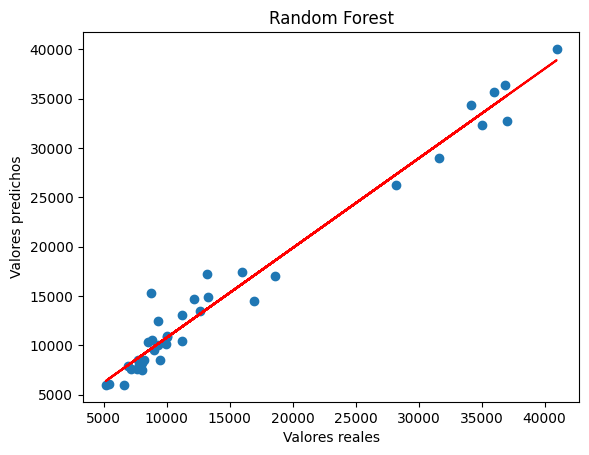

In [ ]:
m,b = np.polyfit(y_test, pred_rf, 1)
plt.scatter(y_test, pred_rf)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Random Forest')
plt.plot(y_test, m*y_test+b, color='red')

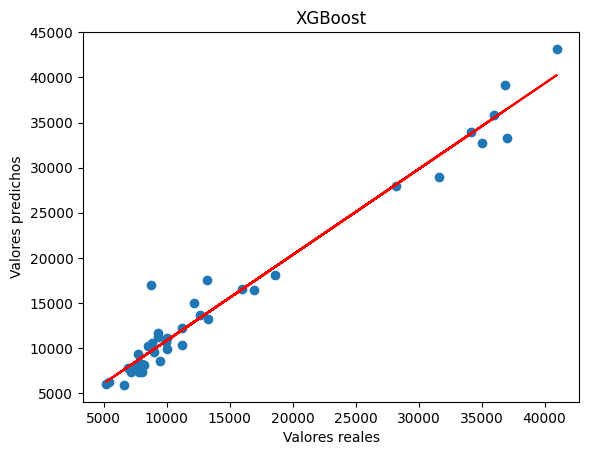

In [ ]:
m,b = np.polyfit(y_test, pred_xgb, 1)
plt.scatter(y_test, pred_xgb)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('XGBoost')
plt.plot(y_test, m*y_test+b, color='red')

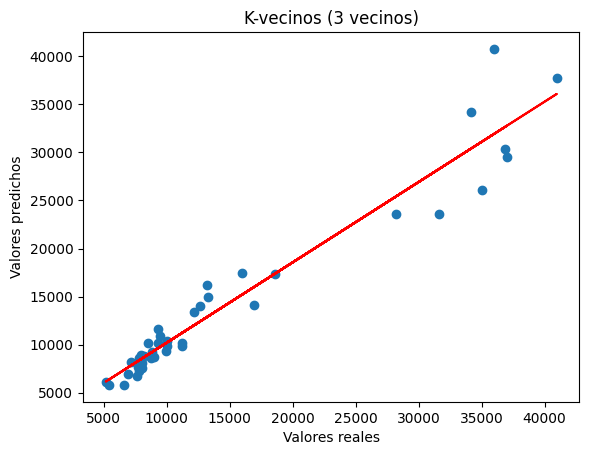

In [ ]:
m,b = np.polyfit(y_test, pred_knn, 1)
plt.scatter(y_test, pred_knn)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('K-vecinos (3 vecinos)')
plt.plot(y_test, m*y_test+b, color='red')

### Casos hipotéticos

In [ ]:
def entrenamiento_RF_atributos(atributos,X_train, y_train, X_test, y_test):
  rf = RandomForestRegressor(n_estimators=10000, random_state=42)
  rf.fit(X_train[atributos], y_train)
  y_pred_rf = rf.predict(X_test[atributos])
  return mean_squared_error(y_test, y_pred_rf), root_mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf), y_pred_rf

In [ ]:
def entrenamiento_XGBoost_atributos(atributos, X_train, y_train, X_test, y_test):
  xgb = XGBRegressor(n_estimators=10000, random_state=42)
  xgb.fit(X_train[atributos], y_train)
  y_pred_xgb = xgb.predict(X_test[atributos])
  return mean_squared_error(y_test, y_pred_xgb), root_mean_squared_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb), y_pred_xgb

In [ ]:
rf_a, rf_rmse_a, rf_r2_a, pred_rf_a = entrenamiento_RF_atributos(['peso', 'mpg_carretera'], X_train, y_train, X_test, y_test)
rf_b, rf_rmse_b, rf_r2_b, pred_rf_b = entrenamiento_RF_atributos(['peso', 'mpg_carretera', 'mpg_ciudad'], X_train, y_train, X_test, y_test)
rf_c, rf_rmse_c, rf_r2_c, pred_rf_c = entrenamiento_RF_atributos(['peso', 'mpg_carretera', 'mpg_ciudad', 'ancho'], X_train, y_train, X_test, y_test)
rf_d, rf_rmse_d, rf_r2_d, pred_rf_d = entrenamiento_RF_atributos(['peso', 'mpg_carretera', 'mpg_ciudad', 'ancho', 'caballos_fuerza'], X_train, y_train, X_test, y_test)

In [ ]:
print("Resultados por selección de atributos con modelo Random Forest")
print(f'Peso y MPG en carretera: \n MSE {rf_a:.2f} \n RMSE {rf_rmse_a:.2f} \n R2 {rf_r2_a:.2f}')
print(f'Peso, MPG en carretera y MPG en ciudad: \n MSE {rf_b:.2f} \n RMSE {rf_rmse_b:.2f} \n R2 {rf_r2_b:.2f}')
print(f'Peso, MPG en carretera, MPG en ciudad y ancho: \n MSE {rf_c:.2f} \n RMSE {rf_rmse_c:.2f} \n R2 {rf_r2_c:.2f}')
print(f'Peso, MPG en carretera, MPG en ciudad, ancho y caballos de fuerza: \n MSE {rf_d:.2f} \n RMSE {rf_rmse_d:.2f} \n R2 {rf_r2_d:.2f}')

Resultados por selección de atributos con modelo Random Forest
Peso y MPG en carretera: 
 MSE 15865435.78 
 RMSE 3983.14 
 R2 0.86
Peso, MPG en carretera y MPG en ciudad: 
 MSE 9805549.34 
 RMSE 3131.38 
 R2 0.91
Peso, MPG en carretera, MPG en ciudad y ancho: 
 MSE 8415037.11 
 RMSE 2900.87 
 R2 0.92
Peso, MPG en carretera, MPG en ciudad, ancho y caballos de fuerza: 
 MSE 7053476.58 
 RMSE 2655.84 
 R2 0.94


In [ ]:
xgb_a, xgb_rmse_a, xgb_r2_a, pred_xgb_a = entrenamiento_XGBoost_atributos(['peso', 'mpg_carretera'], X_train, y_train, X_test, y_test)
xgb_b, xgb_rmse_b, xgb_r2_b, pred_xgb_b = entrenamiento_XGBoost_atributos(['peso', 'mpg_carretera', 'mpg_ciudad'], X_train, y_train, X_test, y_test)
xgb_c, xgb_rmse_c, xgb_r2_c, pred_xgb_c = entrenamiento_XGBoost_atributos(['peso', 'mpg_carretera', 'mpg_ciudad', 'ancho'], X_train, y_train, X_test, y_test)
xgb_d, xgb_rmse_d, xgb_r2_d, pred_xgb_d = entrenamiento_XGBoost_atributos(['peso', 'mpg_carretera', 'mpg_ciudad', 'ancho', 'caballos_fuerza'], X_train, y_train, X_test, y_test)

In [ ]:
print("Resultados por selección de atributos con modelo XGBoost")
print(f'Peso y MPG en carretera: \n MSE {xgb_a:.2f} \n RMSE {xgb_rmse_a:.2f} \n R2 {xgb_r2_a:.2f}')
print(f'Peso, MPG en carretera y MPG en ciudad: \n MSE {xgb_b:.2f} \n RMSE {xgb_rmse_b:.2f} \n R2 {xgb_r2_b:.2f}')
print(f'Peso, MPG en carretera, MPG en ciudad y ancho: \n MSE {xgb_c:.2f} \n RMSE {xgb_rmse_c:.2f} \n R2 {xgb_r2_c:.2f}')
print(f'Peso, MPG en carretera, MPG en ciudad, ancho y caballos de fuerza: \n MSE {xgb_d:.2f} \n RMSE {xgb_rmse_d:.2f} \n R2 {xgb_r2_d:.2f}')

Resultados por selección de atributos con modelo XGBoost
Peso y MPG en carretera: 
 MSE 16461193.20 
 RMSE 4057.24 
 R2 0.85
Peso, MPG en carretera y MPG en ciudad: 
 MSE 18851296.66 
 RMSE 4341.81 
 R2 0.83
Peso, MPG en carretera, MPG en ciudad y ancho: 
 MSE 14605769.30 
 RMSE 3821.75 
 R2 0.87
Peso, MPG en carretera, MPG en ciudad, ancho y caballos de fuerza: 
 MSE 5805075.82 
 RMSE 2409.37 
 R2 0.95


### Distribución de casos hipotéticos de (Random Forest)

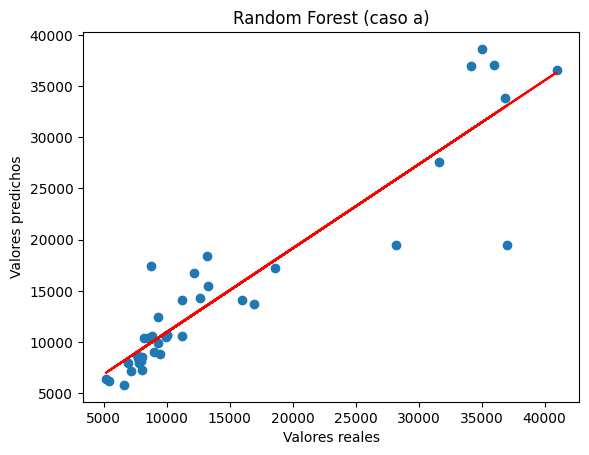

In [ ]:
m,b = np.polyfit(y_test, pred_rf_a, 1)
plt.scatter(y_test, pred_rf_a)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Random Forest (caso a)')
plt.plot(y_test, m*y_test+b, color='red')

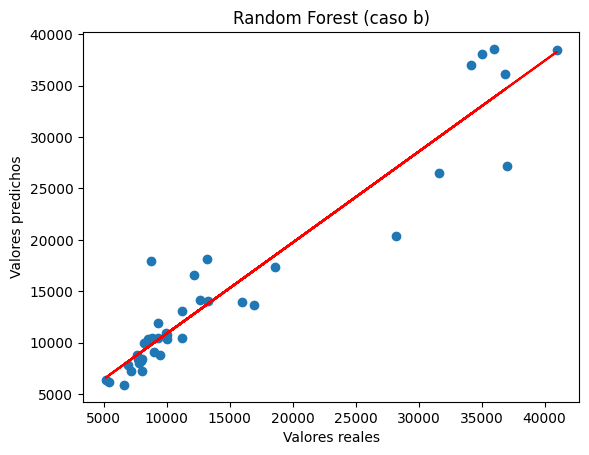

In [ ]:
m,b = np.polyfit(y_test, pred_rf_b, 1)
plt.scatter(y_test, pred_rf_b)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Random Forest (caso b)')
plt.plot(y_test, m*y_test+b, color='red')

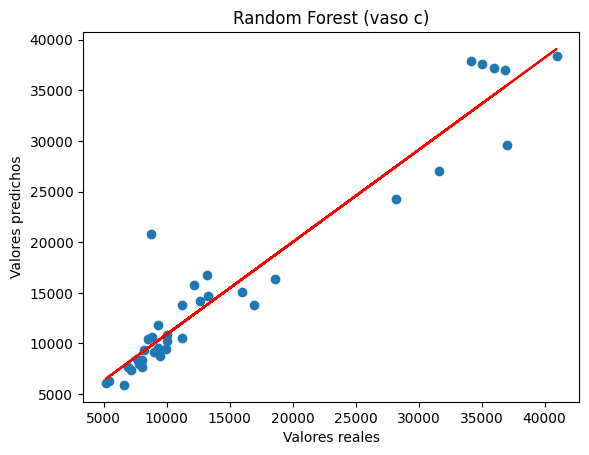

In [ ]:
m,b = np.polyfit(y_test, pred_rf_c, 1)
plt.scatter(y_test, pred_rf_c)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Random Forest (vaso c)')
plt.plot(y_test, m*y_test+b, color='red')

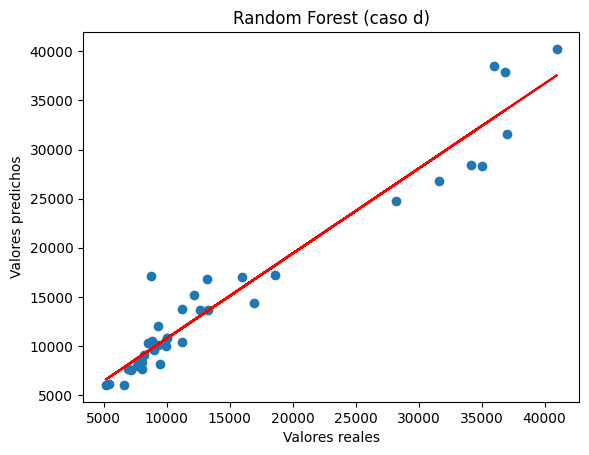

In [ ]:
m,b = np.polyfit(y_test, pred_rf_d, 1)
plt.scatter(y_test, pred_rf_d)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Random Forest (caso d)')
plt.plot(y_test, m*y_test+b, color='red')

### Distribución de casos hipotéticos (XGBoost)

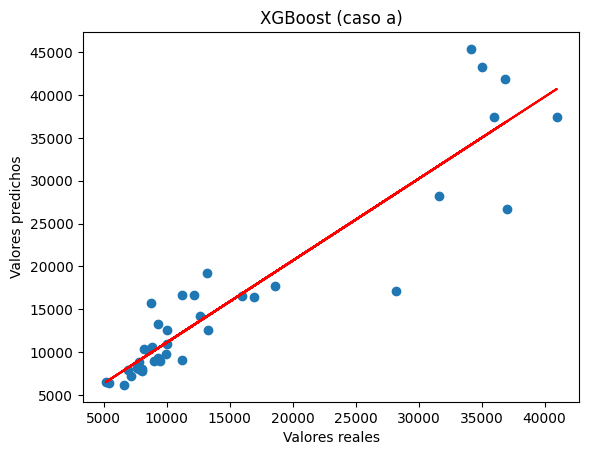

In [ ]:
m,b = np.polyfit(y_test, pred_xgb_a, 1)
plt.scatter(y_test, pred_xgb_a)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('XGBoost (caso a)')
plt.plot(y_test, m*y_test+b, color='red')

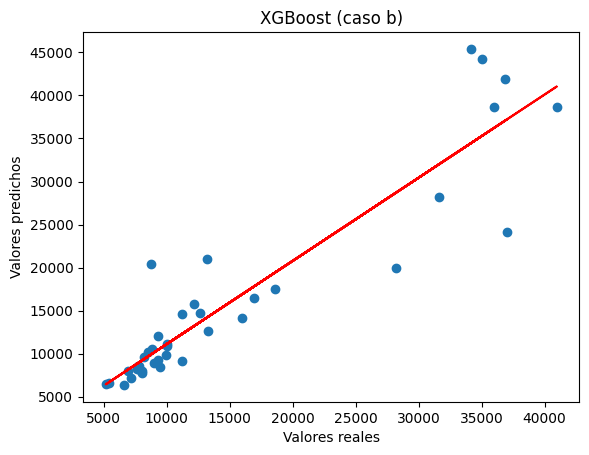

In [ ]:
m,b = np.polyfit(y_test, pred_xgb_b, 1)
plt.scatter(y_test, pred_xgb_b)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('XGBoost (caso b)')
plt.plot(y_test, m*y_test+b, color='red')

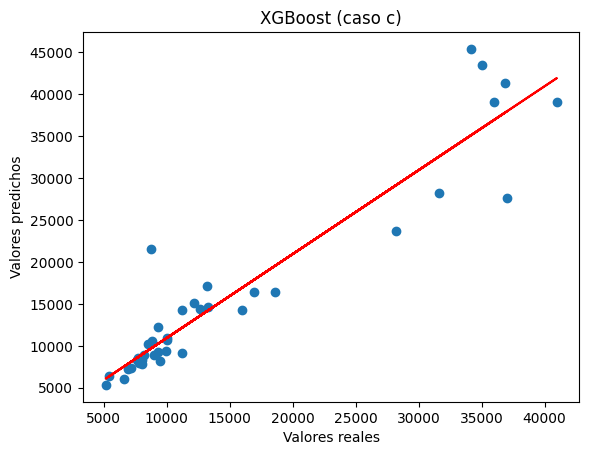

In [ ]:
m,b = np.polyfit(y_test, pred_xgb_c, 1)
plt.scatter(y_test, pred_xgb_c)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('XGBoost (caso c)')
plt.plot(y_test, m*y_test+b, color='red')

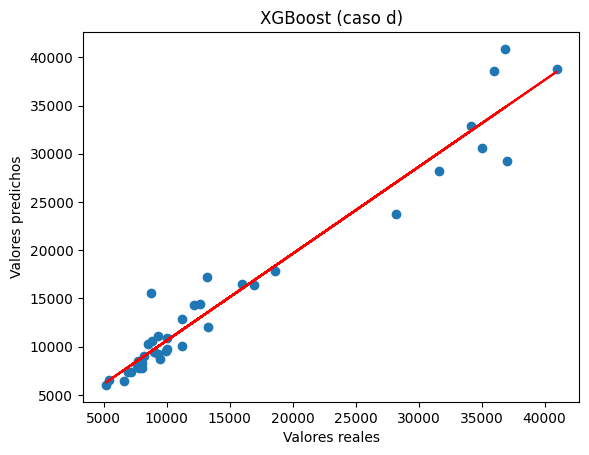

In [ ]:
m,b = np.polyfit(y_test, pred_xgb_d, 1)
plt.scatter(y_test, pred_xgb_d)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('XGBoost (caso d)')
plt.plot(y_test, m*y_test+b, color='red')